In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 400 

In [3]:
df = pd.read_csv('cleaned_data.csv')
print('Read data successfully')

Read data successfully


In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df['LIMIT_BAL'].values.reshape(-1,1),df['default payment next month'].values,test_size=0.2, random_state=24)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [6]:
from sklearn.linear_model import LogisticRegression
linear = LogisticRegression(C=1e40, solver='liblinear')
model = linear.fit(x_train,y_train)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [8]:
test_predictions = model.predict_proba(x_test)

In [9]:
test_predictions

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [10]:
from sklearn import metrics
metrics.roc_auc_score(y_test,test_predictions[:,1])

0.6201990844642832

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve for Logistic Regression')

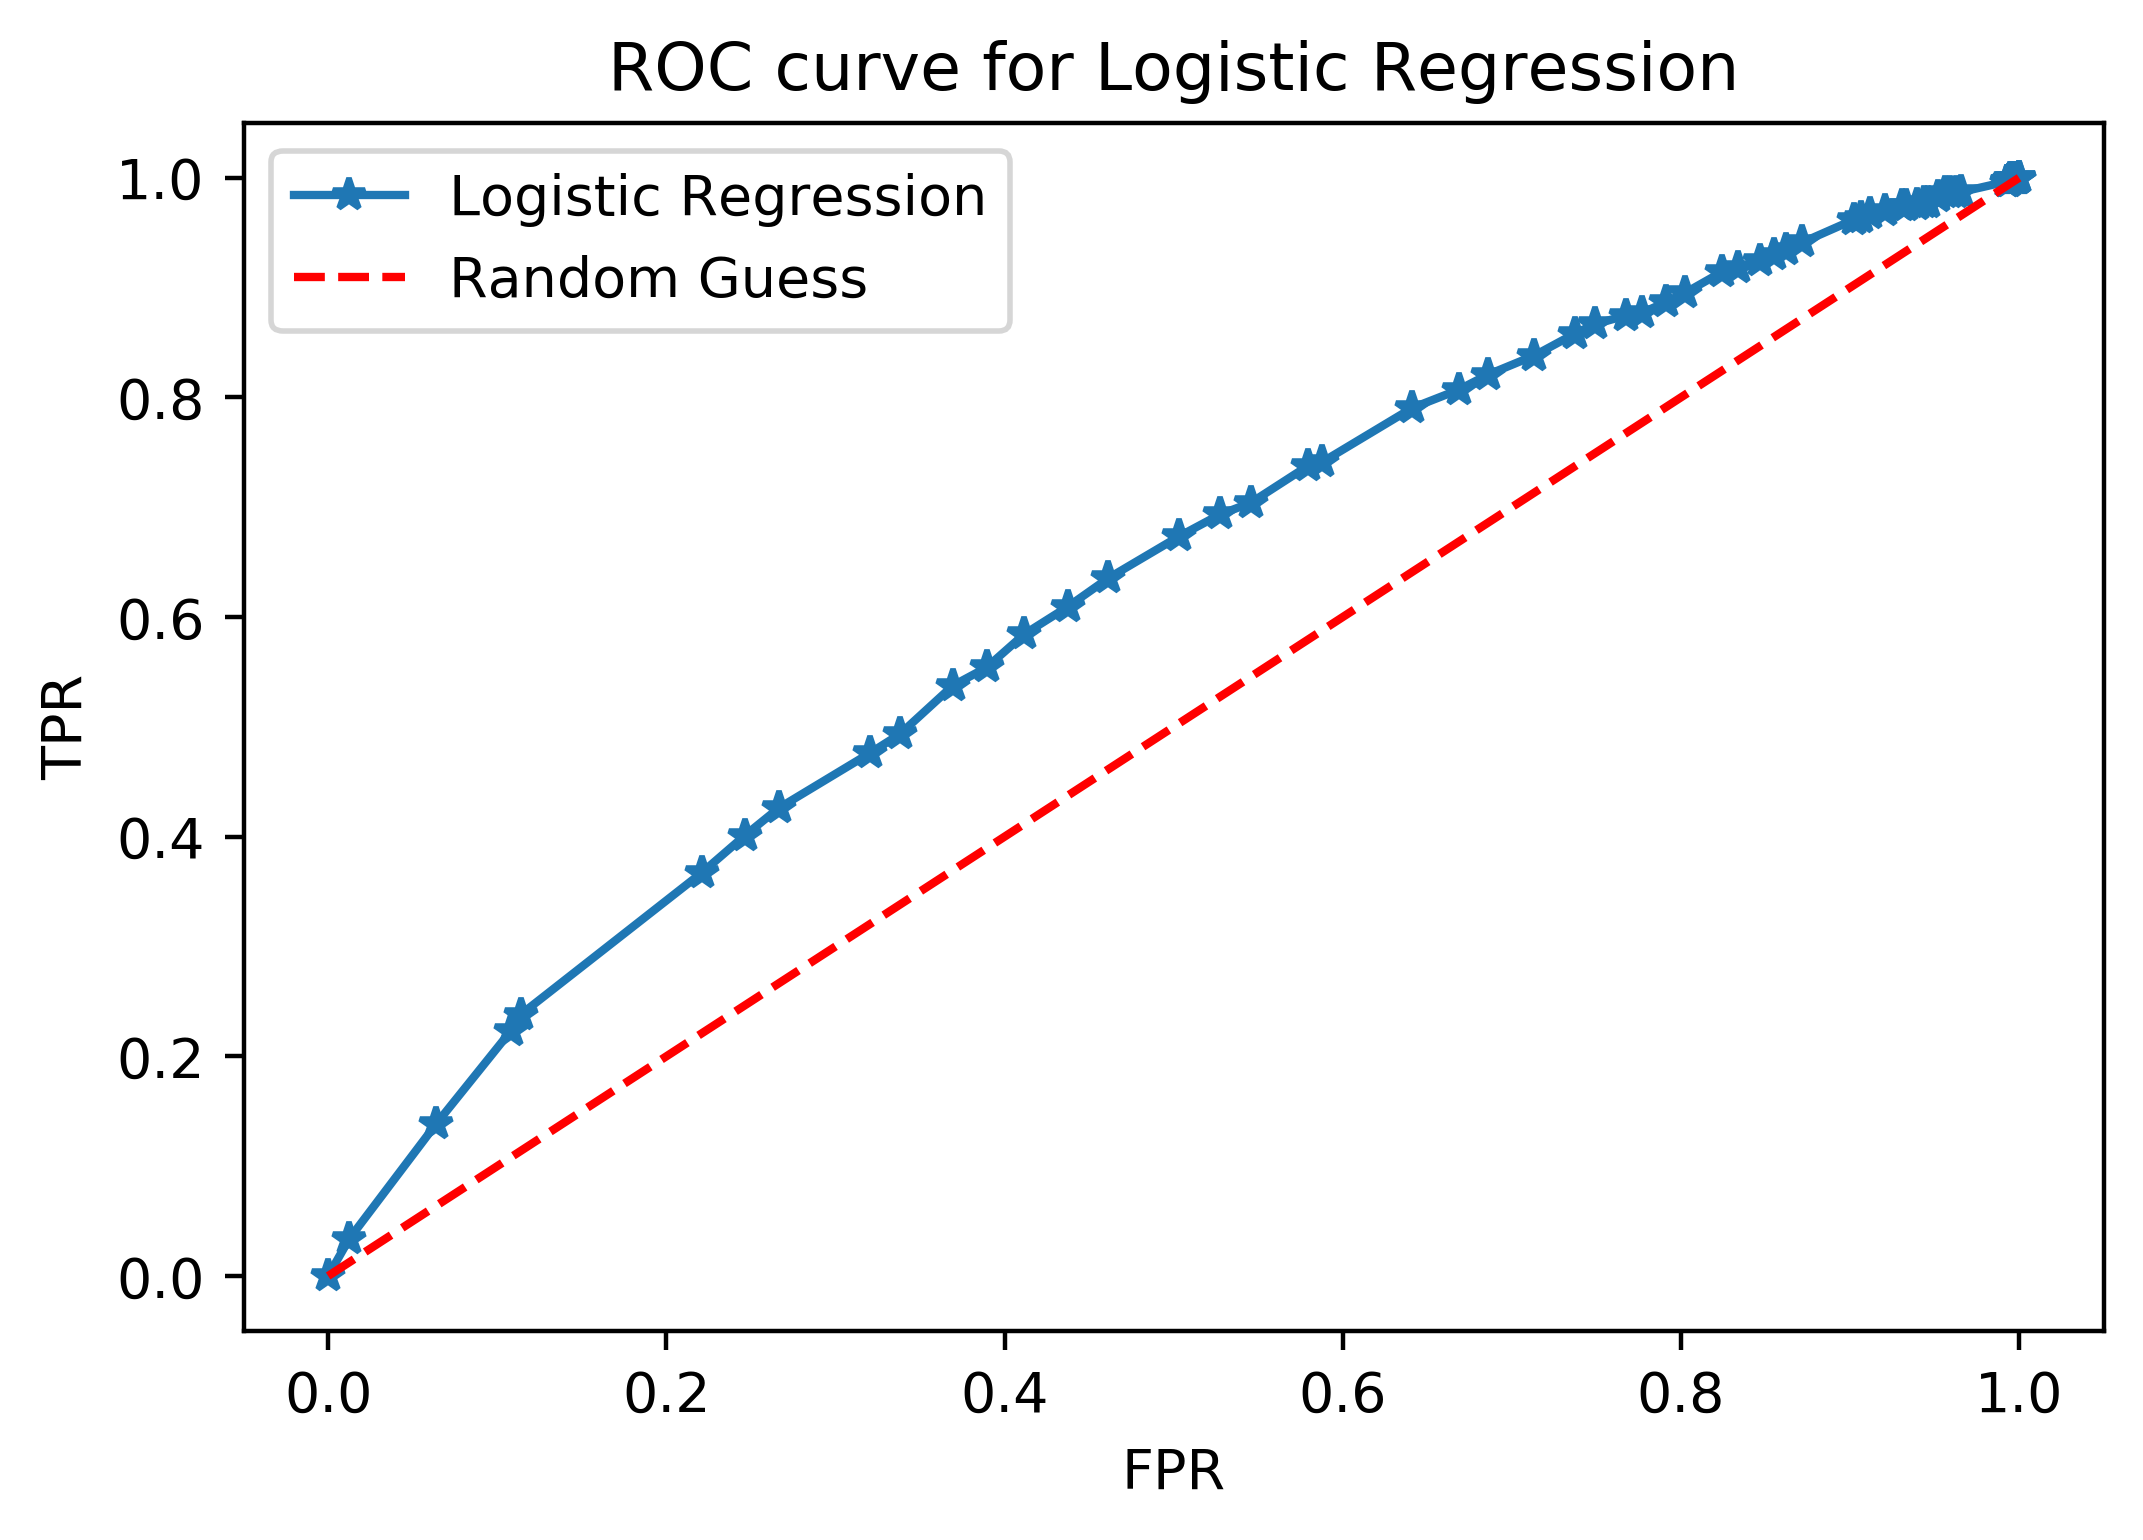

In [12]:

fpr, tpr, thresh = metrics.roc_curve(y_test, test_predictions[:,1])
plt.plot(fpr,tpr,'*-')
plt.plot([0,1],[0,1],'r--')
plt.legend(['Logistic Regression','Random Guess'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Logistic Regression')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [13]:
precision,recall,th=metrics.precision_recall_curve(y_test,test_predictions[:,1])


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


(0, 1)

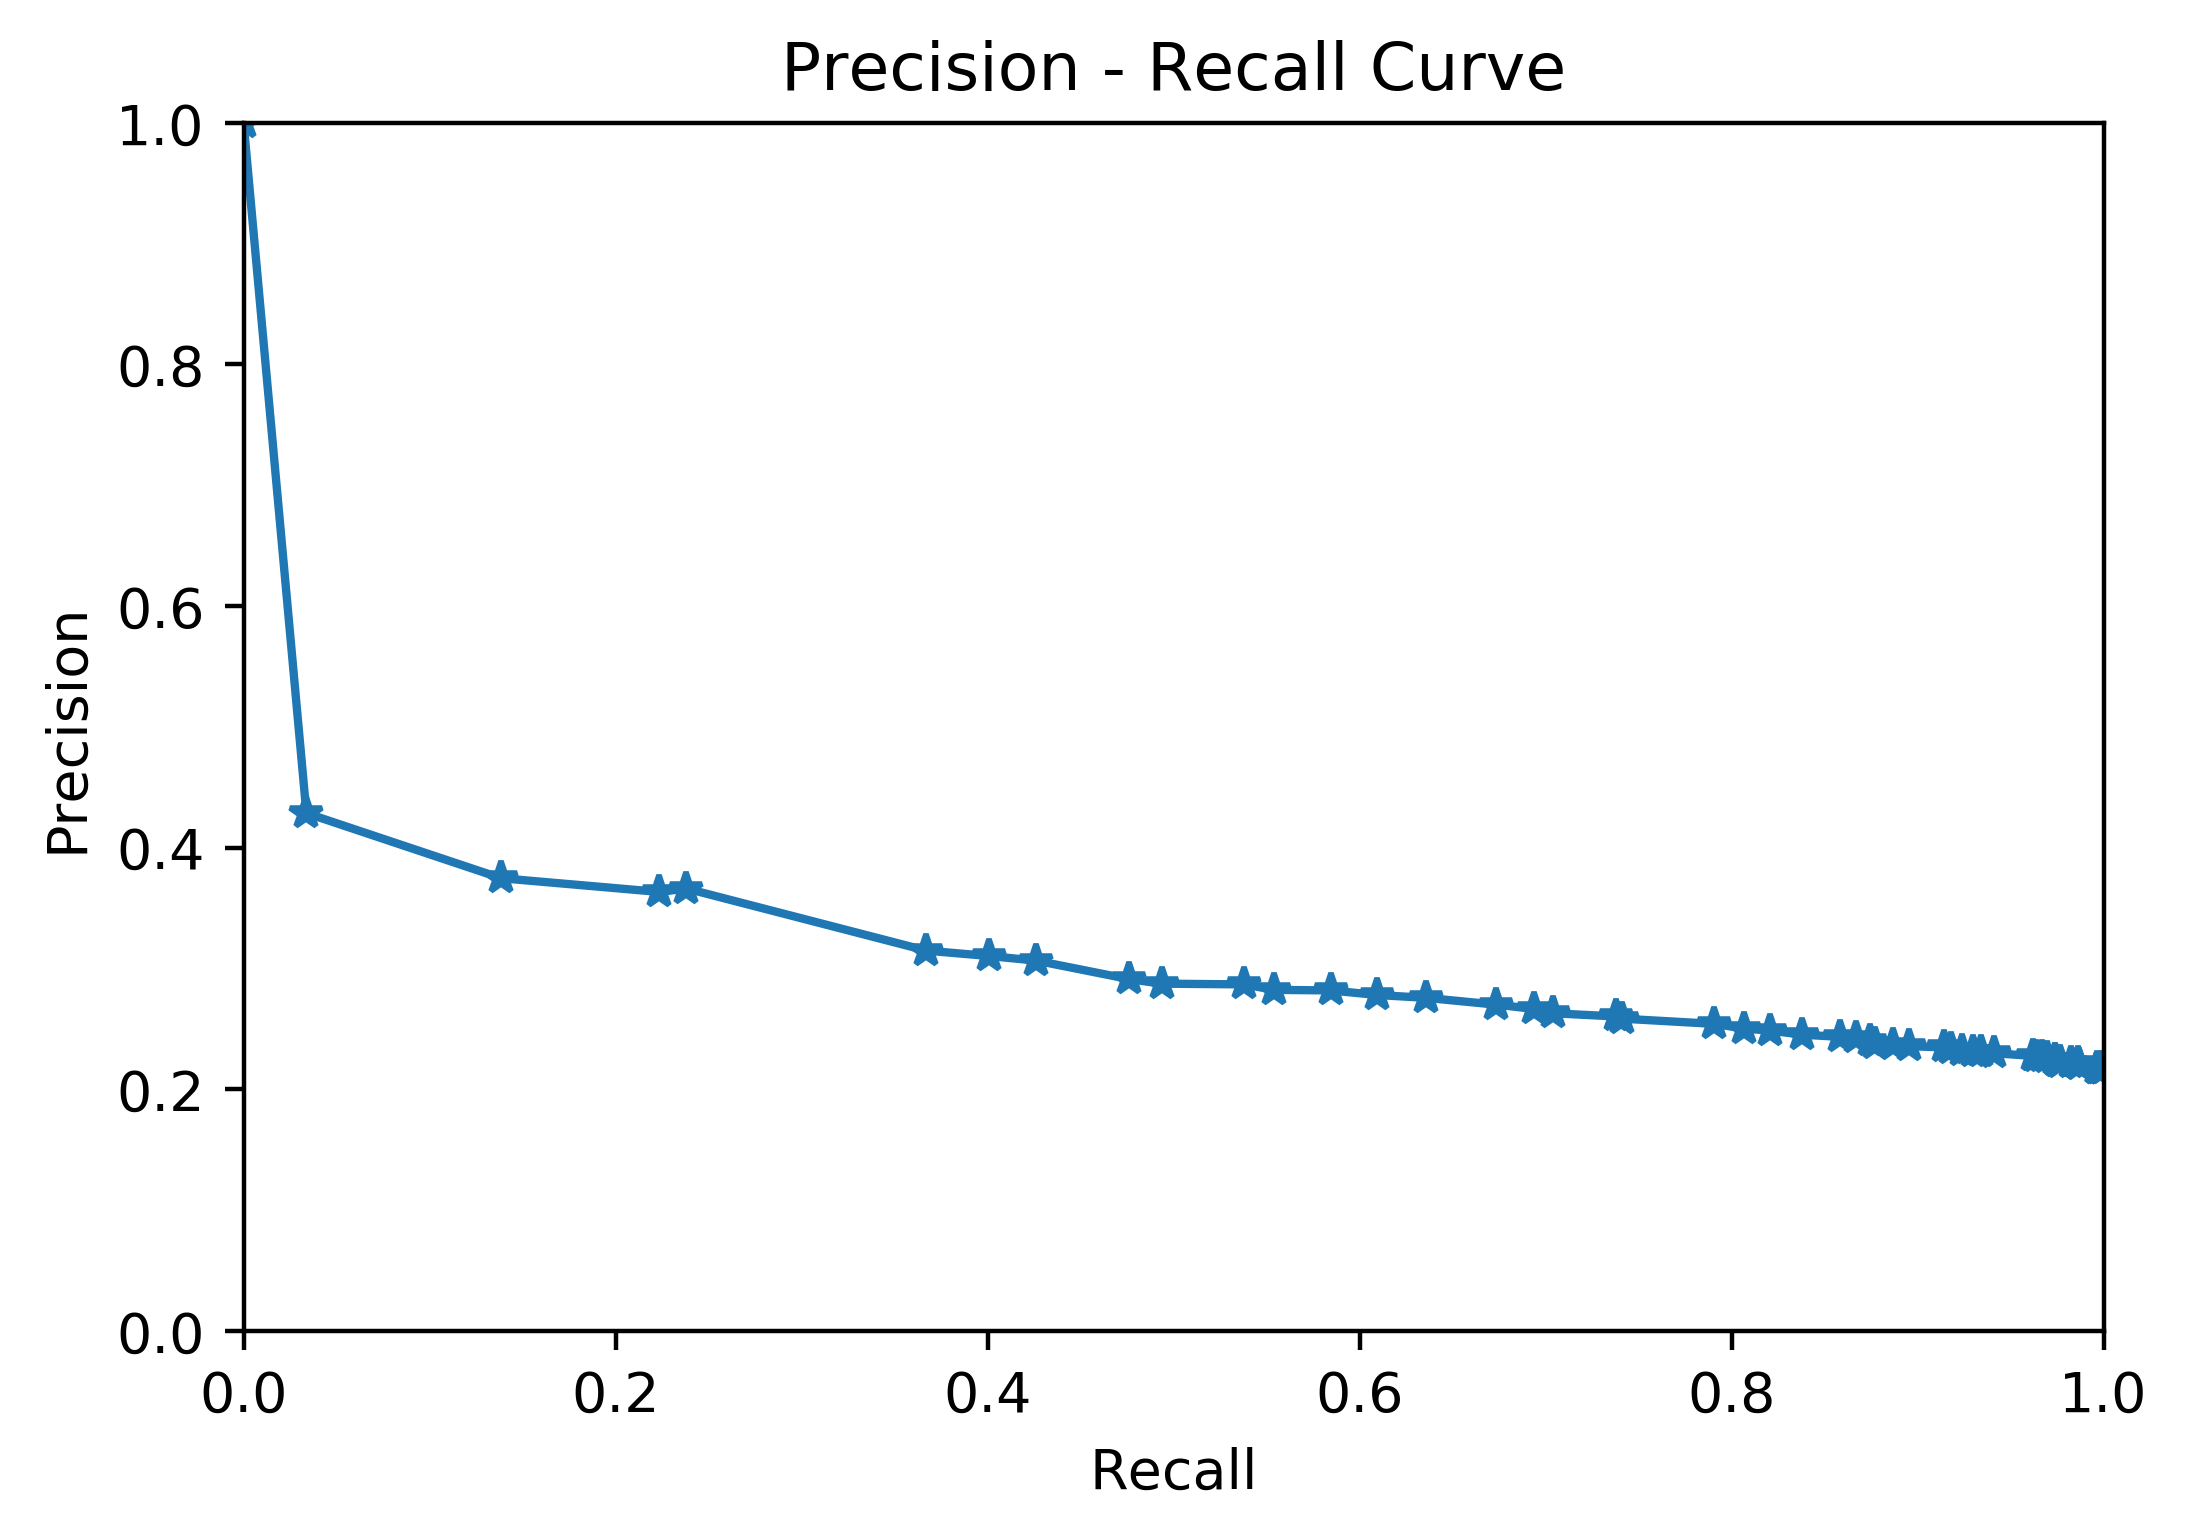

In [14]:
plt.plot(recall,precision,'-*')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision - Recall Curve')
plt.xlim([0,1])
plt.ylim([0,1])

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [15]:
metrics.auc(recall,precision)


0.31566964427378624

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [16]:
train_predictions=model.predict_proba(x_train)
metrics.roc_auc_score(y_train,train_predictions[:,1])

0.6182918113358344

    How is this different, conceptually and quantitatively, from your earlier calculation?
